In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(0)
pd.plotting.register_matplotlib_converters()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
# Questão 6.1
test = pd.read_csv("Arquivos csv/test.csv")
train = pd.read_csv("Arquivos csv/train.csv")

train_describe = train.describe()

# Identificar as Features do banco de dados que são categóricas e as que são númericas
features_categoricas_test = []
features_numericas_test = []
for columns in test.columns:
    if test[columns].dtype == object:
        features_categoricas_test.append(columns)
    else:
        features_numericas_test.append(columns)
        
features_categoricas_train = []
features_numericas_train = []
for columns in train.columns:
    if train[columns].dtype == object:
        features_categoricas_train.append(columns)
    else:
        features_numericas_train.append(columns)

# Quais Features contém NaN e a quantidade em cada Feature
qtd = []
features_nan = []
for columns in test.columns:
    if pd.isnull(test[columns]).sum() != 0:
        qtd.append(pd.isnull(test[columns]).sum())
        features_nan.append(columns)
        
features_nan_test = pd.DataFrame({'Columns': features_nan, 'Quantidade': qtd})

qtd = []
features_nan = []
for columns in train.columns:
    if pd.isnull(train[columns]).sum() != 0:
        qtd.append(pd.isnull(train[columns]).sum())
        features_nan.append(columns)
        
features_nan_train = pd.DataFrame({'Columns': features_nan, 'Quantidade': qtd})

# Informações dos bancos de dados:
# test.csv
print("No banco de dados 'test.csv', tem-se: \nFeatures categóricas: ")
for i in features_categoricas_test:
    print("- ", i)

print("\nFeatures númericas:")
for i in features_numericas_test:
    print("- ", i)
    
print("\nFeatures que contém NaN: ")
for i in features_nan_test.index:
    print(" - {}; {} células NaN".format(features_nan_test['Columns'][i], features_nan_test['Quantidade'][i]))
    
# train.csv
print("\nNo banco de dados 'train.csv', tem-se: ")
print("\nMomentos estatísticos do dataframe \n", train_describe)
print("\n\nFeatures categóricas: ")
for i in features_categoricas_train:
    print("- ", i)

print("Features númericas:")
for i in features_numericas_train:
    print("- ", i)
    
print("\nFeatures que contém NaN: ")
for i in features_nan_train.index:
    print(" - {}; {} células NaN".format(features_nan_train['Columns'][i], features_nan_train['Quantidade'][i]))

# Novos dataframes apenas com as features numéricas do banco de dados
test_new = test.drop(features_categoricas_test, axis = 1);
train_new = train.drop(features_categoricas_train, axis = 1)

# Retirar as linhas que contenham NaN das features do banco de dados 'train.csv'
train_new = train_new.dropna(axis = 0)

# Subtituir os NaN pelo valor 0 no banco de dados de 'test.csv'
test_new = test_new.fillna(0)

No banco de dados 'test.csv', tem-se: 
Features categóricas: 
-  Name
-  Sex
-  Ticket
-  Cabin
-  Embarked

Features númericas:
-  PassengerId
-  Pclass
-  Age
-  SibSp
-  Parch
-  Fare

Features que contém NaN: 
 - Age; 86 células NaN
 - Fare; 1 células NaN
 - Cabin; 327 células NaN

No banco de dados 'train.csv', tem-se: 

Momentos estatísticos do dataframe 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

    


Análise: 
A chance de sobreviver aumenta se a pessoa for mais nova;

A chance de sobreviver aumenta se a pessoa for da 1ª classe;

A chance de sobreviver aumenta se a pessoa tiver menos irmãos/cônjuges a bordo;

A chance de sobreviver aumenta se a pessoa tiver menos pais/criança a bordo;


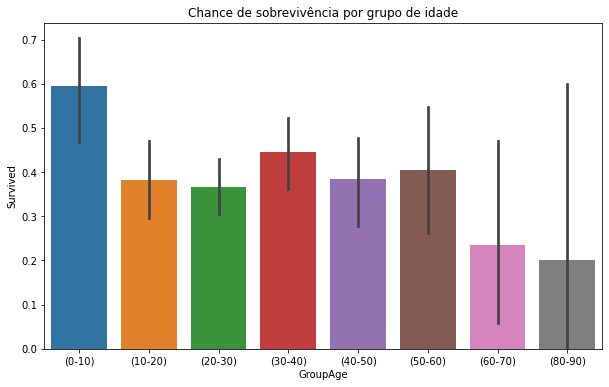

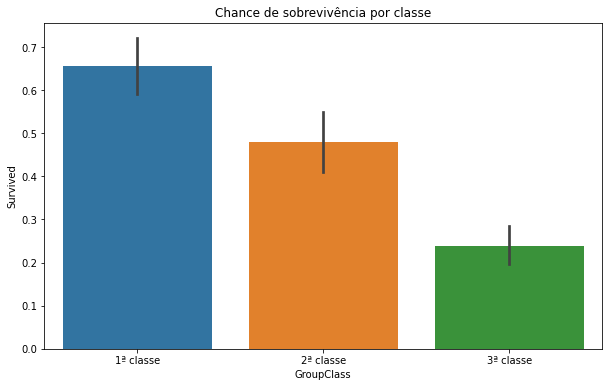

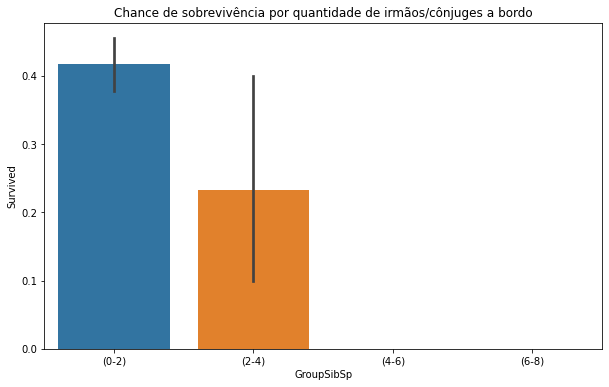

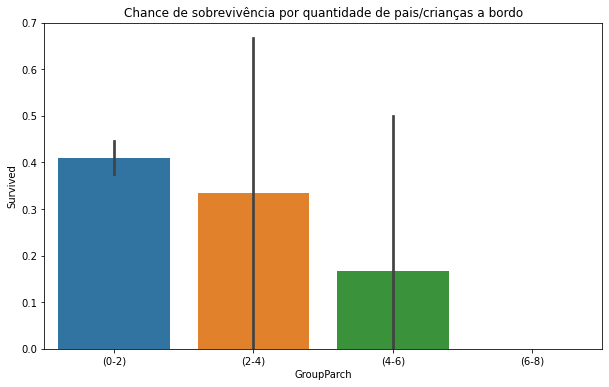

In [20]:
# Questão 6.2
# Feature Age
# Lista com os nomes que serão dados aos grupo em que as idades serão repartidas
grupo = ['(0-10)', '(10-20)', '(20-30)', '(30-40)', '(40-50)', '(50-60)','(60-70)', '(80-90)']

# Separando as idades dos dataframe
train_new['GroupAge'] = pd.cut(x=train_new['Age'], bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80], labels=grupo)

# Gráfico que indica a chance de sobrevivência por grupo de idade
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
plt.title("Chance de sobrevivência por grupo de idade") # Add título
sns.barplot(x = train_new['GroupAge'], y = train_new['Survived'])
print('\nAnálise: \nA chance de sobreviver aumenta se a pessoa for mais nova;')

# Feature Pclass
# Lista com os nomes que serão dados aos grupo em que as classes serão repartidas
grupo = ['1ª classe', '2ª classe', '3ª classe']

# Separando as idades dos dataframe
train_new['GroupClass'] = pd.cut(x=train_new['Pclass'], bins=[0, 1, 2, 3], labels=grupo)

# Gráfico que indica a chance de sobrevivência por grupo de idade
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
plt.title("Chance de sobrevivência por classe") # Add título
sns.barplot(x = train_new['GroupClass'], y = train_new['Survived'])
print('\nA chance de sobreviver aumenta se a pessoa for da 1ª classe;')

# Feature SibSp
# Lista com os nomes que serão dados aos grupo em que as classes serão repartidas
grupo = ['(0-2)', '(2-4)', '(4-6)', '(6-8)']

# Separando as idades dos dataframe
train_new['GroupSibSp'] = pd.cut(x=train_new['SibSp'], bins=[-1, 2, 4, 6, 8], labels=grupo)

# Gráfico que indica a chance de sobrevivência por grupo de idade
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
plt.title("Chance de sobrevivência por quantidade de irmãos/cônjuges a bordo") # Add título
sns.barplot(x = train_new['GroupSibSp'], y = train_new['Survived'])
print('\nA chance de sobreviver aumenta se a pessoa tiver menos irmãos/cônjuges a bordo;')

# Feature Parch
# Lista com os nomes que serão dados aos grupo em que as classes serão repartidas
grupo = ['(0-2)', '(2-4)', '(4-6)', '(6-8)']

# Separando as idades dos dataframe
train_new['GroupParch'] = pd.cut(x=train_new['Parch'], bins=[-1, 2, 4, 6, 8], labels=grupo)

# Gráfico que indica a chance de sobrevivência por grupo de idade
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
plt.title("Chance de sobrevivência por quantidade de pais/crianças a bordo") # Add título
sns.barplot(x = train_new['GroupParch'], y = train_new['Survived'])
print('\nA chance de sobreviver aumenta se a pessoa tiver menos pais/criança a bordo;')

In [21]:
# Questão 6.3
# Tirar a coluna que contém o ID dos passageiros antes de treinar o modelo
train_new = train_new.drop(['PassengerId'], axis = 1)
features_numericas_train.remove('PassengerId')
features_numericas_train.remove('Survived')

# Criar variável X, contendo as Features
X = train_new[features_numericas_train]

# Criar variável y, contendo o target
y = train_new['Survived']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size = 0.2)

# Treinar random forest com as features e o target de treino
modelo_titanic = RandomForestClassifier()

# Realizar a predição
modelo_titanic.fit(train_X, train_y)

predicted_survived = modelo_titanic.predict(val_X)
qualidade = accuracy_score(val_y, predicted_survived)
print("\nPorcentagem das predições que foram acertadas pelo modelo: {:.2f}%".format((qualidade*100)))

# Gerar predição
idPassenger = test_new['PassengerId']
test_new = test_new.drop('PassengerId', axis=1)
predicted_survived = modelo_titanic.predict(test_new)
saida = pd.DataFrame({'PassengerId' : idPassenger, 'Survived' : predicted_survived})
saida.to_csv('Arquivos csv/test_predicted.csv', index = False)
print("\n", saida)


Porcentagem das predições que foram acertadas pelo modelo: 67.13%

      PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         1
414         1306         1
415         1307         0
416         1308         1
417         1309         1

[418 rows x 2 columns]
